# Customer Feedback Analysis

### Importing libraries and tweaking global settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

### Import raw data, display basic information

In [2]:
df = pd.read_csv('/kaggle/input/customer-feedback-and-satisfaction/customer_feedback_satisfaction.csv')
print("Dimensions: ",df.shape)
df.dtypes

Dimensions:  (38444, 11)


CustomerID             int64
Age                    int64
Gender                object
Country               object
Income                 int64
ProductQuality         int64
ServiceQuality         int64
PurchaseFrequency      int64
FeedbackScore         object
LoyaltyLevel          object
SatisfactionScore    float64
dtype: object

In [3]:
df.describe()

,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.0000,38444.0000,38444.0000,38444.0000,38444.0000,38444.0000,38444.0000
mean,19222.5000,43.4969,75076.6192,5.4947,5.4928,10.4539,85.2764
std,11097.9712,14.9727,25975.7530,2.8732,2.8758,5.7656,16.8986
min,1.0000,18.0000,30001.0000,1.0000,1.0000,1.0000,4.2800
25%,9611.7500,31.0000,52624.5000,3.0000,3.0000,5.0000,74.4700
50%,19222.5000,43.0000,75236.0000,5.0000,5.0000,10.0000,91.2700
75%,28833.2500,56.0000,97606.7500,8.0000,8.0000,15.0000,100.0000
max,38444.0000,69.0000,119999.0000,10.0000,10.0000,20.0000,100.0000


In [4]:
print("Unique countries", df['Country'].unique())
print("Unique feedback scores", df['FeedbackScore'].unique())
print("Unique loyalty levels", df['LoyaltyLevel'].unique())
df.head()

Unique countries ['UK' 'USA' 'France' 'Germany' 'Canada']
Unique feedback scores ['Low' 'Medium' 'High']
Unique loyalty levels ['Bronze' 'Gold' 'Silver']


,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0000
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0000
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0000
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0000
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0000


## Data Cleaning

Here, I want to touch up the data by converting data types and alter a selection of column names. Specifically, I want to create numeric mapped columns for a few ranked string type columns so that I can check the correlation against other variables in my analysis. Furthermore, I'd like to group metrics like age and income into brackets to get a better idea of the distribution.

In [5]:
# Creating corresponding number columns to Feedback Score and Loyalty Level to monitor their correlation with other values
conditions = [
    (df['FeedbackScore'] == "Low"),
    (df['FeedbackScore'] == "Medium"),
    (df['FeedbackScore'] == "High")
]
choices = [1,2,3]
# This line will create a conditional column using my previously defined conditions, and their corresponding choice outcomes:
df['FeedbackNum'] = np.select(conditions,choices,default=0)

conditions = [
    (df['LoyaltyLevel'] == "Bronze"),
    (df['LoyaltyLevel'] == "Silver"),
    (df['LoyaltyLevel'] == "Gold")
]
choices = [1,2,3]
# This line will create a conditional column using my previously defined conditions, and their corresponding choice outcomes:
df['LoyaltyNum'] = np.select(conditions,choices,default=0)

conditions = [
    ((df['Age'] >= 18) & (df['Age'] <= 24)),
    ((df['Age'] >= 25) & (df['Age'] <= 34)),
    ((df['Age'] >= 35) & (df['Age'] <= 44)),
    ((df['Age'] >= 45) & (df['Age'] <= 54)),
    (df['Age'] >= 55)
]
choices = ["18-24","25-34","35-44","45-54","55+"]
# This line will create a conditional column using my previously defined conditions, and their corresponding choice outcomes:
df['AgeBracket'] = np.select(conditions,choices,default=0)

conditions = [
    (df['Income'] < 40000),
    ((df['Income'] >= 40000) & (df['Income'] < 60000)),
    ((df['Income'] >= 60000) & (df['Income'] < 80000)),
    ((df['Income'] >= 80000) & (df['Income'] < 100000)),
    (df['Income'] >= 100000)
]
choices = ["<40k","40k-60k","60k-80k","80k-100k","100k+"]
# This line will create a conditional column using my previously defined conditions, and their corresponding choice outcomes:
df['IncomeBracket'] = np.select(conditions,choices,default=0)

df.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore,FeedbackNum,LoyaltyNum,AgeBracket,IncomeBracket
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0000,1,1,55+,80k-100k
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0000,2,3,55+,80k-100k
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0000,2,2,45-54,60k-80k
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0000,1,3,25-34,60k-80k
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0000,1,1,55+,80k-100k


Visualizing missing values using the missing number library

<Axes: >

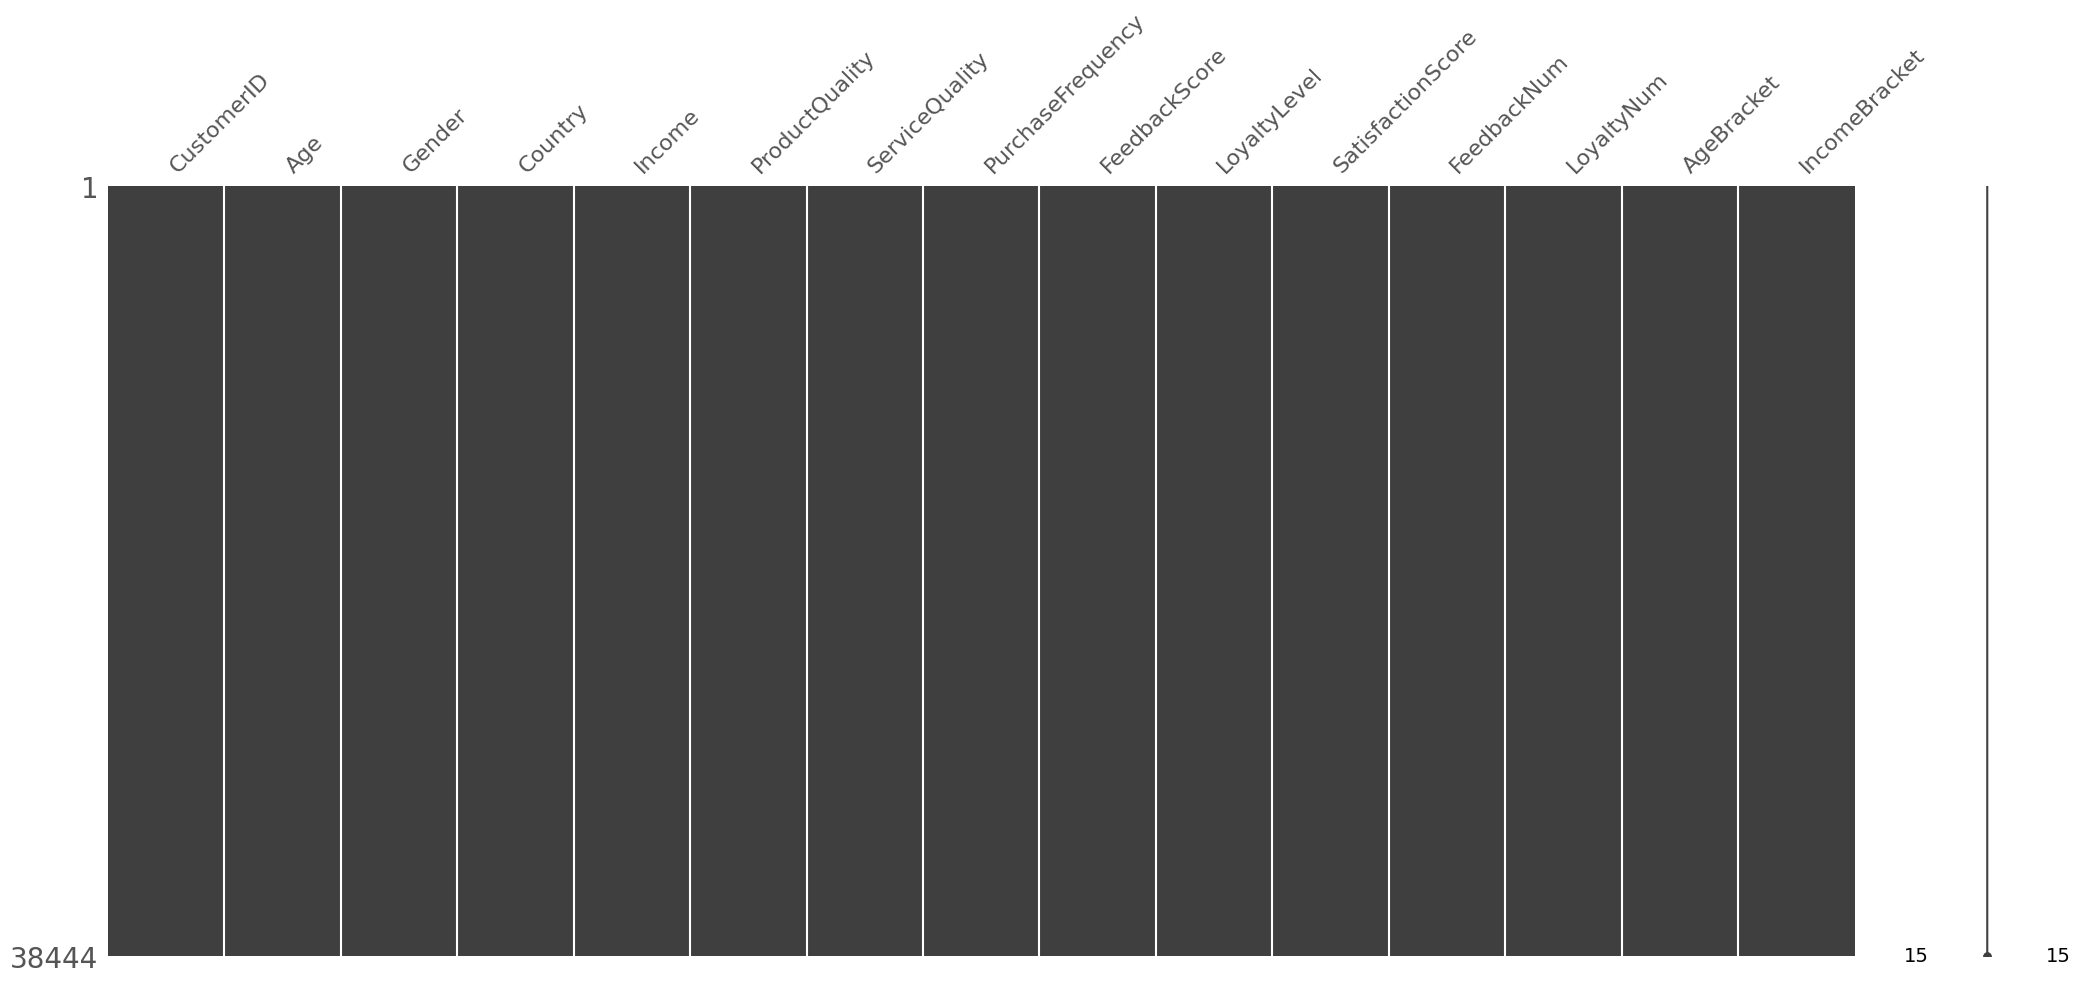

In [6]:
msno.matrix(df)

Checking the dataframe for missing values, although the data appears clean from viewing the above plot.

In [7]:
# Checking for missing values
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
FeedbackNum          0
LoyaltyNum           0
AgeBracket           0
IncomeBracket        0
dtype: int64

Next, I will check for duplicate values and remove any found.

In [8]:
#checking for and removing duplicate values
df = df.loc[~df.duplicated(subset=['CustomerID'])].reset_index(drop=True).copy()
df.loc[df.duplicated(subset=['CustomerID'])]

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore,FeedbackNum,LoyaltyNum,AgeBracket,IncomeBracket


## Data Analysis

My goal in this exploratory data analysis is to analyze the demographic of potential customers, and which customers tend to react positively towards the product for potential targeted advertising.

FeedbackScore
High      12918
Low       12784
Medium    12742
Name: count, dtype: int64 



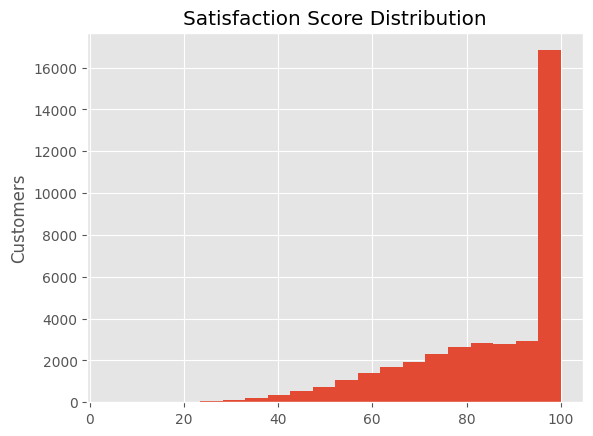

In [9]:
# Looking at the spread of potentially impactful columns
print(df['FeedbackScore'].value_counts(),"\n")

ax=df['SatisfactionScore'].plot(kind='hist',bins=20,title='Satisfaction Score Distribution')
ax.set_xlabel('')
ax.set_ylabel('Customers')
plt.show()

In [10]:
# This function is not too important, and serves the purpose of making the upcoming visuals easier to interpret with automatically adjusting data labels
def shortnum(num):
    if num>=1000000:
        return f'{num/1000000:.1f}M'
    elif num>=1000:
        return f'{num/1000:.1f}K'
    else:
        return num.asstring()

Next, I want to get an idea of the customer demographics by plotting distributions of defining columns in the dataframe such as age, income, and residence.

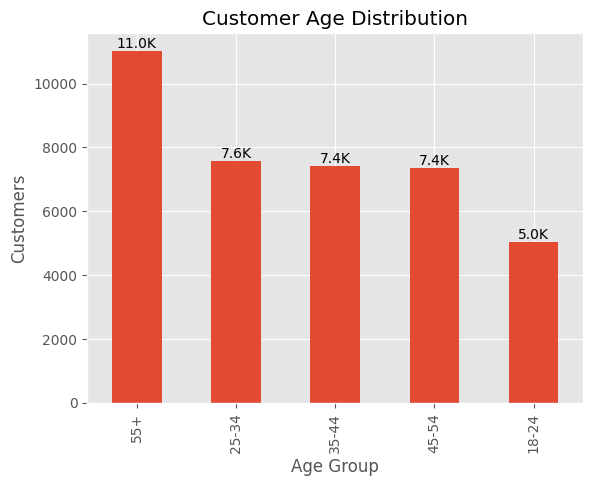

In [11]:
# Now analyzing a summary of critical numeric columns

# Looking for the age bracket that yields the most customers
df_Age = df[['CustomerID','AgeBracket']].groupby('AgeBracket').agg('count').sort_values('CustomerID',ascending=False).reset_index().copy()

ax = df_Age.plot(x='AgeBracket',y='CustomerID',kind='bar',title='Customer Age Distribution',legend=False)
ax.set_xlabel('Age Group')
ax.set_ylabel('Customers')

# Apply data labels
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), shortnum(i.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

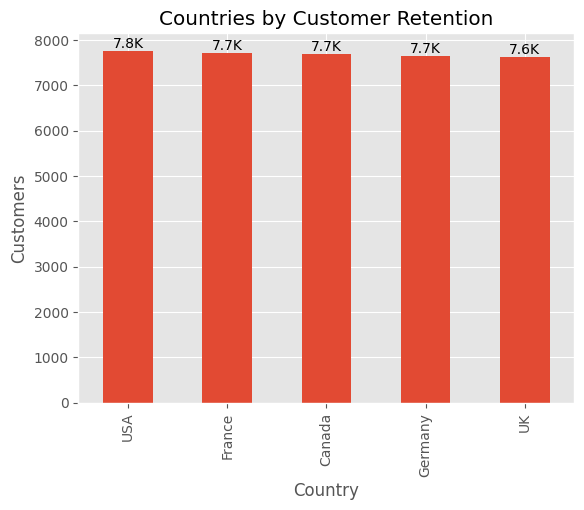

In [12]:
# Looking for the country that yields the most customers
df_Country = df[['CustomerID','Country']].groupby('Country').agg('count').sort_values('CustomerID',ascending=False).reset_index().copy()

ax = df_Country.plot(x='Country',y='CustomerID',kind='bar',title='Countries by Customer Retention',legend=False)
ax.set_xlabel('Country')
ax.set_ylabel('Customers')

# Apply data labels
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), shortnum(i.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

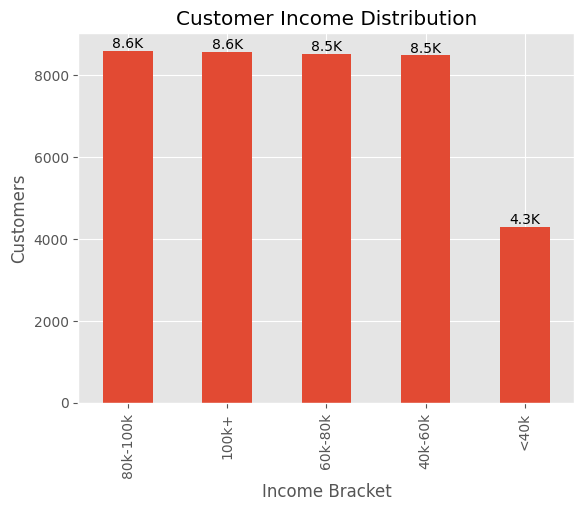

In [13]:
# Looking for the income bracket that yields the most customers
df_Income = df[['CustomerID','IncomeBracket']].groupby('IncomeBracket').agg('count').sort_values('CustomerID',ascending=False).reset_index().copy()

ax = df_Income.plot(x='IncomeBracket',y='CustomerID',kind='bar',title='Customer Income Distribution',legend=False)
ax.set_xlabel('Income Bracket')
ax.set_ylabel('Customers')

# Apply data labels
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), shortnum(i.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

Next, I want to look at potential driving factors for purchase frequency and satisfaction score by plotting correlation values and plots. This is quite easy to do with the Seaborn module:

<Axes: >

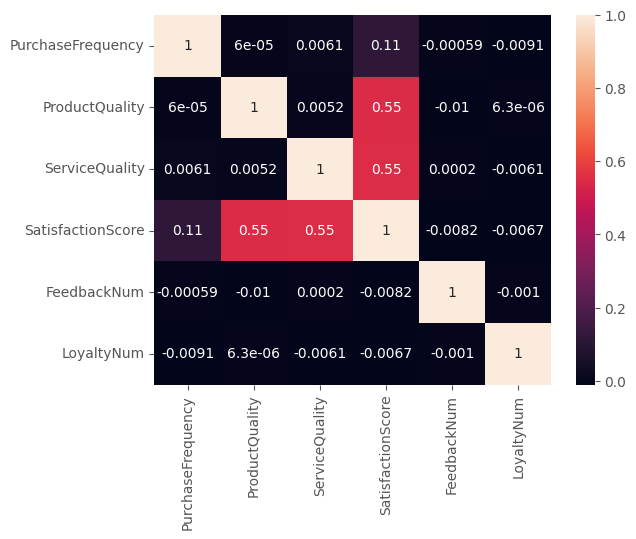

In [14]:
df_corr=df[['PurchaseFrequency','ProductQuality','ServiceQuality','SatisfactionScore','FeedbackNum','LoyaltyNum']].dropna().corr()
sns.heatmap(df_corr,annot=True)

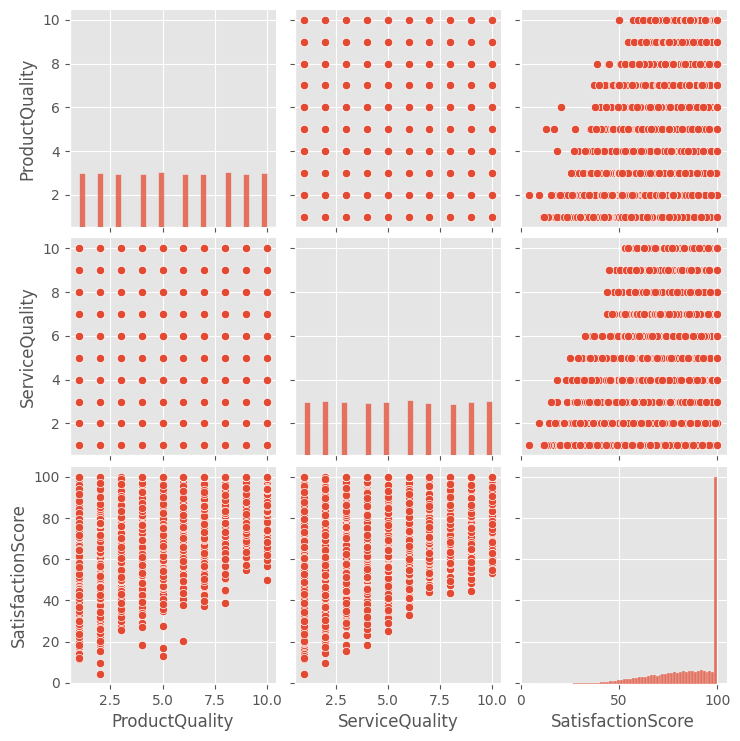

In [15]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.pairplot(df,vars=['ProductQuality','ServiceQuality','SatisfactionScore'])
plt.show()

From viewing the above visuals, there seems to be a reasonable correlation between satisfaction score and both service/product quality, making it an important metric for producers to focus on.